# Preparation for the demo

In order to use this demo, you'll need to download a basic halo catalog. Details of setting up and working with halotools and the available catalogs can be found in the online getting started guide:

http://halotools.readthedocs.org/en/master/getting_started.html

For now, just download the initial halo catalog, which is all we will work with in this tutorial:

`python scripts/download_initial_halocat.py`

## Demo of a few basic Halotools calculations

In [2]:
%matplotlib inline
from halotools.empirical_models import Hearin15, Leauthaud11, Zheng07

ImportError: cannot import name model_helpers

The above few imports are loading factory functions: these are functions that return instances of composite models. You can always retrieve an instance any of the preloaded models without any keywords, in which case default choices will be made for you:

In [2]:
aph = Hearin15()
alexie = Leauthaud11()
zheng = Zheng07()

NameError: name 'Hearin15' is not defined

The values for these defaults are located in the model_defaults module, so that you can
always set your own defaults rather than use the ones that come with the package. The arguments you pass to these factory functions allow you to customize the model to your liking. Here's a simple example of how to change the stellar mass threshold of the sample being modeled:

In [4]:
model1 = Leauthaud11()
model2 = Leauthaud11(threshold = 11)
print(model1.threshold, model2.threshold)

(10.5, 11)


# Populating mocks

All composite models come with some handy convenience functions:

In [22]:
zheng.populate_mock()

You can populate from any halo catalog you have stored in your cache directory by passing keyword arguments to `populate_mock`. This example will populate the same dark matter simulation as the default populate_mock call above.

In [23]:
model = Zheng07()
model.populate_mock(simname='bolshoi', redshift=0) #Bolshoi simulation

This function creates a `mock` attribute to the model instance. What's happening here is that the first call to the `populate_mock` function loads halo catalog into memory, binds it to the mock object, and then sprinkles in a Monte Carlo realization of galaxies into those halos. You can then access the halos and the galaxies like this. Note that these two models have the same halos, but potentially different galaxies occupying those halos.

In [20]:
print("number of halos = {}".format(len(zheng.mock.halo_table)))
print(zheng.mock.halo_table[0:4])
print("number of halos = {}".format(len(model.mock.halo_table)))
print(model.mock.halo_table[0:4])

number of halos = 952883
halo_scale_factor  halo_id   halo_pid ... host_halo_status NFWmodel_conc
----------------- ---------- -------- ... ---------------- -------------
          1.00035 3060299107       -1 ...   true_host_halo       6.45778
          1.00035 3060312953       -1 ...   true_host_halo       6.47875
          1.00035 3058440575       -1 ...   true_host_halo       6.68856
          1.00035 3058441456       -1 ...   true_host_halo       6.79585
number of halos = 952883
halo_scale_factor  halo_id   halo_pid ... host_halo_status NFWmodel_conc
----------------- ---------- -------- ... ---------------- -------------
          1.00035 3060299107       -1 ...   true_host_halo       6.45778
          1.00035 3060312953       -1 ...   true_host_halo       6.47875
          1.00035 3058440575       -1 ...   true_host_halo       6.68856
          1.00035 3058441456       -1 ...   true_host_halo       6.79585


In [25]:
print("number of galaxies = {}".format(len(zheng.mock.galaxy_table)))
print(zheng.mock.galaxy_table[-4:])
print("number of galaxies = {}".format(len(model.mock.galaxy_table)))
print(model.mock.galaxy_table[-4:])

number of galaxies = 74884
 halo_x  halo_y  halo_id    halo_z halo_vx ...    y       z     vx  vy  vz
------- ------- ---------- ------- ------- ... ------- ------- --- --- ---
248.689 234.745 3071546535 213.453   112.1 ...  234.77 213.473 0.0 0.0 0.0
232.622 230.186 3071571627 221.085  607.64 ... 230.121 220.933 0.0 0.0 0.0
246.379 246.242 3071546648 209.379   93.29 ... 246.268   209.3 0.0 0.0 0.0
245.249 204.253 3071384052 247.484  342.13 ... 204.252 247.494 0.0 0.0 0.0
number of galaxies = 74850
 halo_x  halo_y  halo_id    halo_z halo_vx ...    y       z     vx  vy  vz
------- ------- ---------- ------- ------- ... ------- ------- --- --- ---
220.673 243.957 3069979993 238.109  342.04 ... 243.966  238.09 0.0 0.0 0.0
240.944 222.371 3071593689 245.267  327.09 ... 222.404 245.242 0.0 0.0 0.0
244.186 230.861 3071546938 204.907  358.77 ... 230.863 204.919 0.0 0.0 0.0
226.146 245.059 3071580809 227.928   41.71 ... 245.058 227.927 0.0 0.0 0.0


Note that the redshift of this snapshot that we downloaded may not be exactly 0 (or whichever snapshot you selected to download via scripts/download_alternate_halocats.py) because of the finite time steps of simulations. If you want to know the specific properties of the snapshot you are working with, you can query them directly:

In [13]:
print(zheng.mock.snapshot.redshift, zheng.mock.snapshot.simname)

(-0.00034987754286008865, 'bolshoi')


# Mock Observations

Composite models also have convenience functions for computing two-point functions. If you have not yet populated the mock, it will be automatically populated with the default parameters as part of compute_galaxy_clustering()

In [26]:
model = Zheng07()
r, xi_gg = model.compute_galaxy_clustering()

In [27]:
r, xi_gm = model.compute_galaxy_matter_cross_clustering(num_iterations = 2)

What the `compute_clustering` method, with num_iterations>1, does is populate a mock, compute the clustering of that mock, repeat num_iterations times, and return the median clustering in each separation bin.

As a convenience, you can specify a column name and a value to select a subpopulation. For example, we can calculate the central-cental auto-correlation function like so:

In [ ]:
r, xi_cc = model2.compute_galaxy_clustering(gal_type = 'centrals')

Note that you can also provide your own mask array and/or masking function for more complicated selections.

In addition, halotools can calculate the cross-correlation function of your subpopulation, its complement, and the auto-correlation of the complement via the `include_crosscorr` keyword:

In [28]:
r, xi_cc, xi_cs, xi_ss = model2.compute_galaxy_clustering(gal_type = 'centrals', include_crosscorr = True)

where `xi_cc` is the central-central correlation function (as above), `xi_cs` is the central-satellite cross-correlation, `xi_ss` is the satellite-satellite correlation function.

See the docstrings of these methods for a complete overview of their keyword arguments. 

In [ ]:
from matplotlib.ticker import FuncFormatter
# import seaborn as sns

sns.set_context("notebook", font_scale=1.5)
sns.set_style("whitegrid")

NameError: name 'r' is not defined

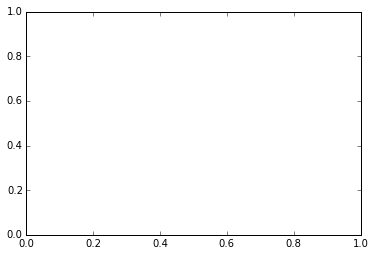

In [3]:
def format(x,pos):
    """Formatter for axes labels."""
    if x < 1:
        return '%3.1f'%x
    else:
        return '%3.0f'%x
#...

xticks = (0.1,0.5,1,5,10,40)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(r,xi_gm,label='gal-matter')
ax.loglog(r,xi_gg,label='gal-gal')
ax.loglog(r,xi_cc,label='cen-cen')
ax.loglog(r,xi_cs,label='cen-sat')
ax.loglog(r,xi_ss,label='sat-sat')
ax.set_xlim(.1,20)
ax.set_xticks(xticks)
formatter = FuncFormatter(format)
ax.xaxis.set_major_formatter(formatter)

plt.legend(loc='best')

## Inspecting your mock

In [35]:
model.populate_mock(simname = 'bolshoi', redshift=0) #Bolshoi simulation, but run with Planck13 cosmology

In [33]:
satmask = model.mock.galaxy_table['gal_type'] == 'satellites'
sats = model.mock.galaxy_table[satmask]
cens = model.mock.galaxy_table[np.invert(satmask)]
print satmask.sum(),(~satmask).sum()

16953 57811


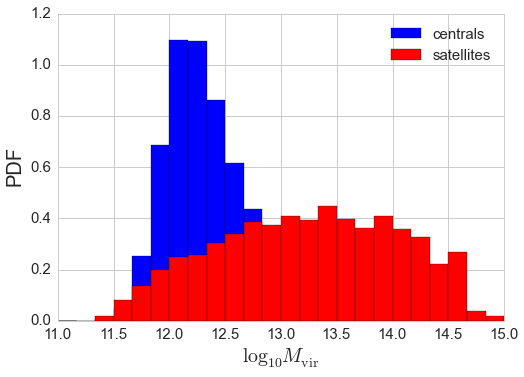

In [34]:
p = plt.hist(np.log10(cens['halo_mvir']), 
             bins = np.linspace(11, 15, 25), label='centrals', color='blue', normed=True)
p = plt.hist(np.log10(sats['halo_mvir']), 
             bins = np.linspace(11, 15, 25), label='satellites', color='red', normed=True)
plt.xlabel(r'${\rm log}_{10}M_{\rm vir}$', fontsize=20)
plt.ylabel('PDF', fontsize=20)
plt.legend(frameon=False)

# Using the underlying analytical relations

There are many analytical relations that are in the component model classes. The composite models sketched above just compose these components into a collective model. Here are a few examples of how to use these underlying analytical relations. 

### Computing the abundance of centrals

Let's compute the mean number of central galaxies as a function of halo mass, for galaxy samples of two different luminosity thresholds:

In [50]:
npts = 1e5
mass = np.logspace(11, 15, npts)
ncen = model.mean_occupation_centrals(prim_haloprop = mass)

model2 = Zheng07(threshold = -19)
ncen2 = model2.mean_occupation_centrals(prim_haloprop = mass)


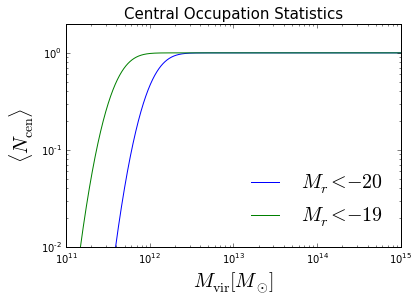

In [51]:
plt.plot(mass, ncen, label=r'$M_{r} < -20$')
plt.plot(mass, ncen2, label=r'$M_{r} < -19$')
plt.loglog()
plt.ylim(ymin = 1e-2, ymax=2)

plt.xlabel(r'$M_{\rm vir} [M_{\odot}]$', fontsize=20)
plt.ylabel(r'$\langle N_{\rm cen}\rangle$', fontsize=20)
plt.title('Central Occupation Statistics', fontsize=15)

plt.legend(frameon=False, fontsize=20, loc=4)

### Stellar-to-halo mass relation for centrals at different redshift

What is the stellar mass of a central galaxy living in a given halo mass? How does this vary with redshift? We can use Peter Behroozi's abundance matching model to answer this.

In [52]:
from halotools.empirical_models import Behroozi10SmHm
beh = Behroozi10SmHm()

In [53]:
sm0 = beh.mean_stellar_mass(prim_haloprop = mass, redshift=0)
sm2 = beh.mean_stellar_mass(prim_haloprop = mass, redshift=2)

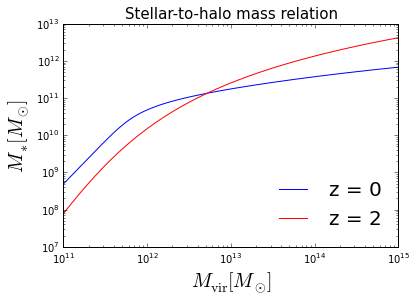

In [54]:
plt.plot(mass, sm0, color='blue', label='z = 0')
plt.plot(mass, sm2, color='red', label = 'z = 2')
plt.loglog()

plt.xlabel(r'$M_{\rm vir} [M_{\odot}]$', fontsize=20)
plt.ylabel(r'$M_{\ast} [M_{\odot}]$', fontsize=20)
plt.title('Stellar-to-halo mass relation', fontsize=15)

plt.legend(frameon=False, loc=4, fontsize=20)

### What halo masses are occupied by centrals of known stellar mass?

In [55]:
print(beh.mean_log_halo_mass(log_stellar_mass = 10.1))
print(beh.mean_log_halo_mass(log_stellar_mass = 10.1, redshift = 2))

11.6158419222
11.9539907315


Or suppose you want a rough idea of the stellar mass pdf of centrals living in a halo of fixed mass at different redshifts:

In [56]:
mass = np.zeros(1e4) + 1e12
sm0 = beh.mc_stellar_mass(prim_haloprop = mass, redshift = 0)
sm3 = beh.mc_stellar_mass(prim_haloprop = mass, redshift = 3)

/Users/parejkoj/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


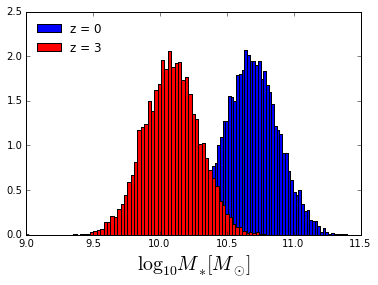

In [58]:
p0 = plt.hist(np.log10(sm0), bins = np.linspace(9.5, 11.5, 100), 
              color='blue', normed=True, label='z = 0')
p3 = plt.hist(np.log10(sm3), bins = np.linspace(9, 11.5, 100), 
              color='red', normed=True, label='z = 3')
plt.legend(frameon=False, loc=2)

plt.xlabel(r'$\log_{10}M_{\ast} [M_{\odot}]$', fontsize=20)
